In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import joblib

## Extração de dados simulados

In [ ]:
df_cicle = pd.DataFrame()

df = pd.read_csv(r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 4\Enterprise Challenge\config\sensor_data_30000.csv")
# df['timestamp_ms'] = df['timestamp_ms']/1000
# df["acc_total"] = np.sqrt(df["accX_g"]**2 + df["accY_g"]**2 + df["accZ_g"]**2)

display(df_cicle)
display(df)

""


,timestamp_ms,cycleCount,tempC,currentA,accX_g,accY_g,accZ_g,alertMsg,acc_total
0,0.0,1,25.00,0.65,0.27,0.28,10.00,NaN,10.007562
1,1.0,1,25.80,0.57,0.29,0.06,9.82,NaN,9.824464
2,2.0,1,26.59,0.65,-0.23,-0.26,9.92,NaN,9.926072
3,3.0,1,27.36,0.69,0.10,-0.18,9.68,NaN,9.682190
4,4.0,1,28.12,0.68,0.10,0.06,9.76,NaN,9.760697
...,...,...,...,...,...,...,...,...,...
29995,29995.0,6000,30.28,0.40,0.03,-0.01,9.81,Alerta: Temperatura alta!,9.810051
29996,29996.0,6000,29.65,0.51,0.00,-0.06,10.07,NaN,10.070179
29997,29997.0,6000,28.98,0.72,0.16,-0.15,9.88,NaN,9.882434
29998,29998.0,6000,28.27,0.64,-0.08,0.20,9.54,NaN,9.542432


## Divisão de dados de treino e dados de teste 70 - 30


In [4]:
X = df.loc[df['cycleCount']>=4200, ['tempC', 'currentA', 'acc_total']]
y = df.loc[df['cycleCount']>=4200,'cycleCount']

df_ml = pd.DataFrame({'cycle':df.loc[df['cycleCount']<4200,'cycleCount'], 'tempC':df.loc[df['cycleCount']<4200,'tempC'], 'currentA':df.loc[df['cycleCount']<4200,'currentA'], 'acc_total':df.loc[df['cycleCount']<4200,'acc_total']})
print(df_ml)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=30)
# print(f'x_train: {x_train.shape}\nx_test: {x_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')
# print(x_train, y_train)

       cycle  tempC  currentA  acc_total
0          1  25.00      0.65  10.007562
1          1  25.80      0.57   9.824464
2          1  26.59      0.65   9.926072
3          1  27.36      0.69   9.682190
4          1  28.12      0.68   9.760697
...      ...    ...       ...        ...
20990   4199  28.23      0.42  10.062271
20991   4199  28.95      0.67   9.516149
20992   4199  29.62      0.52   9.771172
20993   4199  30.25      0.62   9.730786
20994   4199  30.83      0.53   9.641919

[20995 rows x 4 columns]


## Deteção de anomalias
Com esse modelo, é possivel identificar comportamentos fora do padrão 

-1: Anormal

1: Normal

In [5]:
# X = dados combinando temperatura, corrente e vibração
for col in ['tempC', 'currentA', 'acc_total']:
    model = IsolationForest(contamination=0.01)
    model.fit(X[[col]])

    df_ml[f'{col}_anomaly'] = model.predict(df_ml[[col]])

### Gerando visual para identificação de anomalias
Os dados serão gerados com base em um perido de 10 minutos (120 ciclos)

Os pontos azuis representam os dados considerados sem anomalias, enquanto os pontos vermelhos representam as anomalias encontradas.

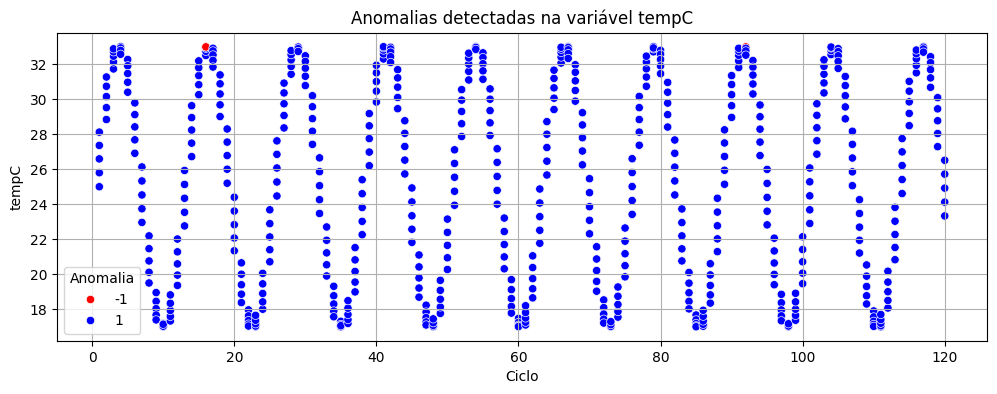

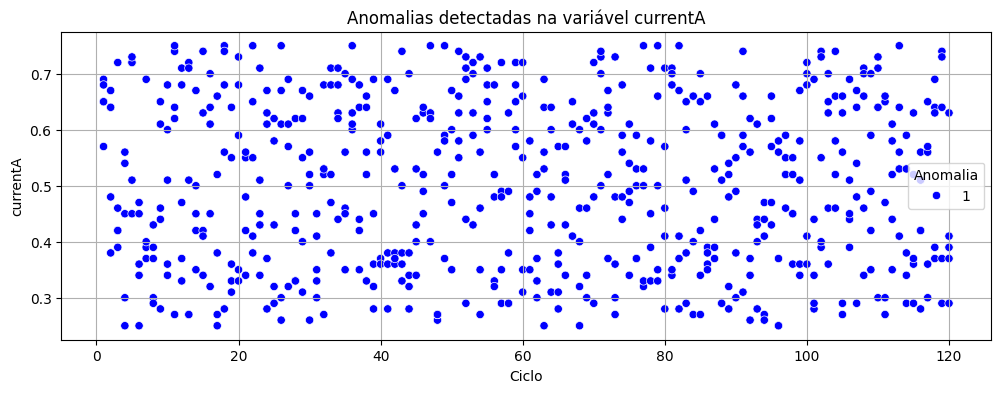

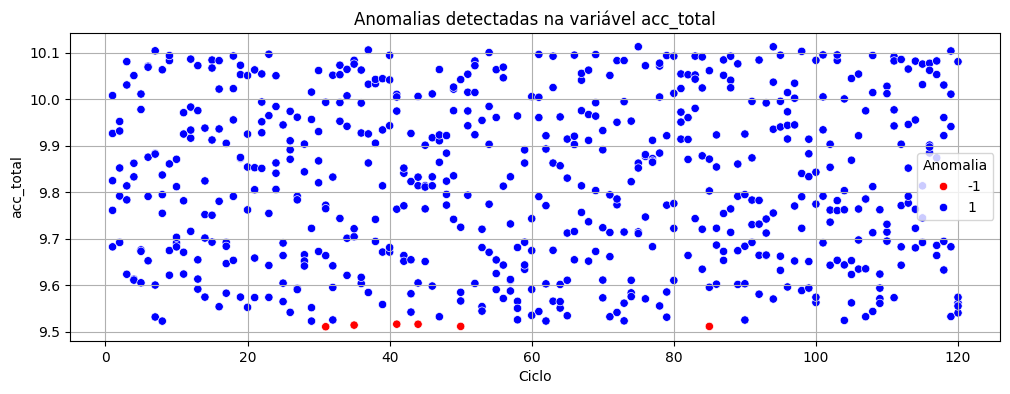

In [6]:
for col in ['tempC', 'currentA', 'acc_total']:
    plt.figure(figsize=(12, 4))
    sns.scatterplot(data=df_ml.loc[df_ml['cycle']<=120], x='cycle', y=col, hue=f'{col}_anomaly', palette={1: 'blue', -1: 'red'})
    plt.title(f'Anomalias detectadas na variável {col}')
    plt.legend(title='Anomalia')
    plt.xlabel('Ciclo')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## Clusterização do acelerometro
Os dados serão gerados com base em um perido de 10 minutos (120 ciclos)
Será utilizado para validar o estrade de aceleração da maquina com base nos dados fornecidos de anomalia.

In [ ]:
# KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df_ml['cluster'] = kmeans.fit_predict(df_ml[['acc_total']])

# Gráfico
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_ml.loc[df_ml['cycle']<=120], x='cycle', y='acc_total', hue='cluster', palette='Set2', )
plt.title('Clusters de aceleração total por ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Aceleração total')
plt.legend()
plt.show()